In [2]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
column_names = ['Date', 'Time', 'PM2.5', 'Status']  # Replace with actual column names
data = pd.read_csv('AirData.csv', names=column_names, header=None)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 5, saw 5


In [25]:
pm25_array = data["PM2.5"]

In [11]:
print(pm25_array)

0                                              NaN
1                                              NaN
2       PM2.5 particulate matter (Hourly measured)
3                                              2.8
4                                              4.3
                           ...                    
8759                                           2.1
8760                                           2.2
8761                                           4.1
8762                                           4.7
8763                                           NaN
Name: PM2.5, Length: 8764, dtype: object


In [12]:
data = data.dropna(subset=["PM2.5"])

In [13]:
data["PM2.5"] = pd.to_numeric(
    data["PM2.5"], errors='coerce')

In [14]:
pm_array = data["PM2.5"].to_numpy()

In [15]:
print(pm_array)

[nan 2.8 4.3 ... 2.2 4.1 4.7]


In [16]:
date_array = data["Date"]

In [17]:
print(date_array)

2             Date
3       2023-01-01
4       2023-01-01
5       2023-01-01
6       2023-01-01
           ...    
8758    2023-12-31
8759    2023-12-31
8760    2023-12-31
8761    2023-12-31
8762    2023-12-31
Name: Date, Length: 8761, dtype: object


In [18]:
data = data.dropna(subset=["Date"])

In [19]:
date_array = data["Date"].to_numpy()

In [20]:
print(date_array)

['Date' '2023-01-01' '2023-01-01' ... '2023-12-31' '2023-12-31'
 '2023-12-31']


In [21]:
date_array = pd.to_datetime(data["Date"]).to_numpy()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7816\469515703.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_array = pd.to_datetime(data["Date"]).to_numpy()


DateParseError: Unknown datetime string format, unable to parse: Date, at position 0

In [22]:
print(data.columns)

Index(['Date', 'Time', 'PM2.5', 'Status'], dtype='object')


In [26]:
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Time"], errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7816\2139636870.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Time"], errors='coerce')


In [27]:
print(data["Date"].unique())
print(data["Time"].unique())

['Date' '2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22' '2023-01-23' '2023-01-24' '2023-01-25'
 '2023-01-26' '2023-01-27' '2023-01-28' '2023-01-29' '2023-01-30'
 '2023-01-31' '2023-02-01' '2023-02-02' '2023-02-03' '2023-02-04'
 '2023-02-05' '2023-02-06' '2023-02-07' '2023-02-08' '2023-02-09'
 '2023-02-10' '2023-02-11' '2023-02-12' '2023-02-13' '2023-02-14'
 '2023-02-15' '2023-02-16' '2023-02-17' '2023-02-18' '2023-02-19'
 '2023-02-20' '2023-02-21' '2023-02-22' '2023-02-23' '2023-02-24'
 '2023-02-25' '2023-02-26' '2023-02-27' '2023-02-28' '2023-03-01'
 '2023-03-02' '2023-03-03' '2023-03-04' '2023-03-05' '2023-03-06'
 '2023-03-07' '2023-03-08' '2023-03-09' '2023-03-10' '2023-03-11'
 '2023-03-12' '2023-03-13' '2023-03-14' '2023-03-15' '2023-03-16'
 '2

In [28]:
data["DateTime"] = pd.to_datetime(
    data["Date"] + " " + data["Time"], 
    format="%Y-%m-%d %H:%M:%S", 
    errors="coerce"
)

In [29]:
print(data.columns)

Index(['Date', 'Time', 'PM2.5', 'Status', 'DateTime'], dtype='object')


In [30]:
print(data["DateTime"].head())

2                   NaT
3   2023-01-01 01:00:00
4   2023-01-01 02:00:00
5   2023-01-01 03:00:00
6   2023-01-01 04:00:00
Name: DateTime, dtype: datetime64[ns]


In [31]:
datetime_array = data["DateTime"].to_numpy()

In [32]:
print(datetime_array)

[                          'NaT' '2023-01-01T01:00:00.000000000'
 '2023-01-01T02:00:00.000000000' ... '2023-12-31T22:00:00.000000000'
 '2023-12-31T23:00:00.000000000'                           'NaT']


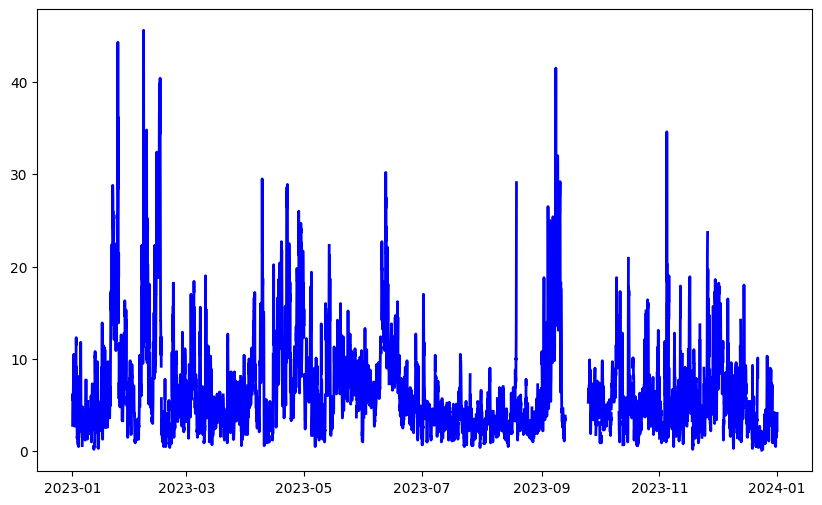

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(datetime_array, pm_array, color="blue", linewidth=2, label="PM2.5 Levels")

Text(0, 0.5, 'PM2.5 Concentration (µg/m³)')

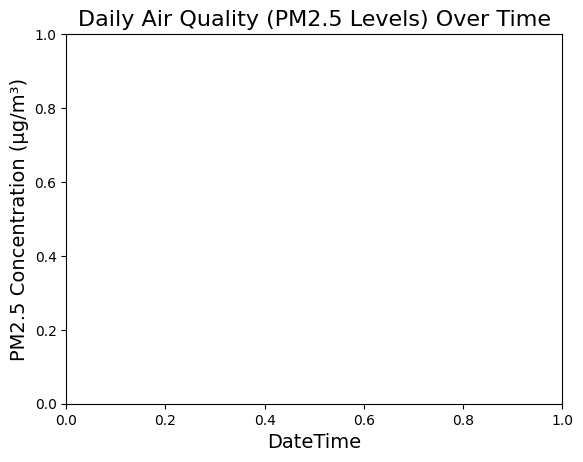

In [35]:
plt.title("Daily Air Quality (PM2.5 Levels) Over Time", fontsize=16)
plt.xlabel("DateTime", fontsize=14)
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=14)

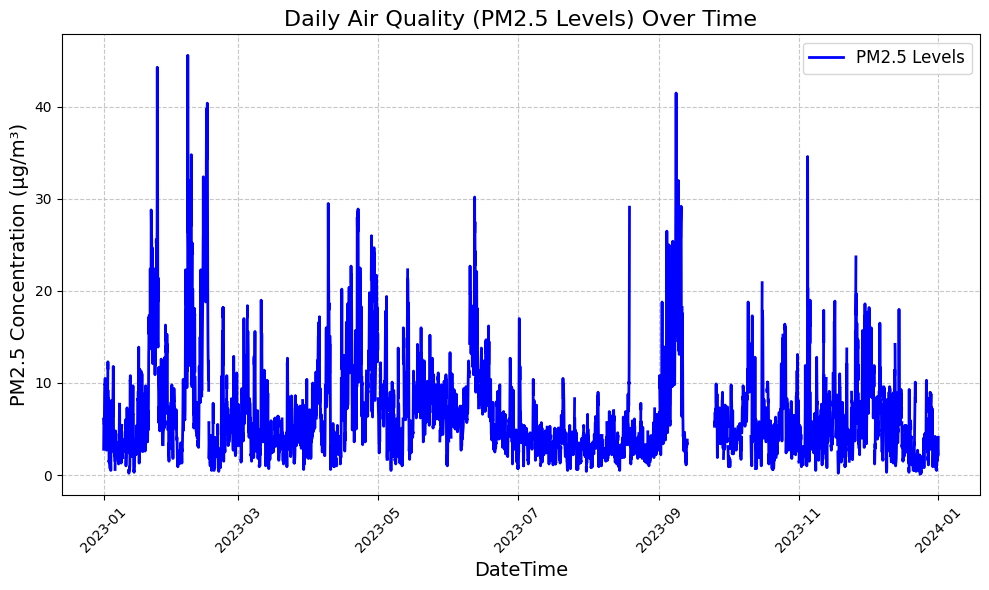

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(datetime_array, pm_array, color="blue", linewidth=2, label="PM2.5 Levels")
plt.title("Daily Air Quality (PM2.5 Levels) Over Time", fontsize=16)
plt.xlabel("DateTime", fontsize=14)
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=14)
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Rotate x-axis labels for clarity (optional)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ModuleNotFoundError: No module named 'statsmodels'

In [41]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.8 MB 465.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.8 MB 416.7 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.8 MB 403.5 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.8 MB 423.5 kB/s eta 0:00:23
    --------------------------------------- 0.1/9.8 MB 425.3 kB/s eta 0:00:23
    --------------------------------------- 0.2/9.8 MB 382.3 kB/s eta 0:00:26
    --------------------------------------- 0.2/9.8 MB 388.2 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 414.8 kB/s eta 0:00:24
    --------------------------------------- 0.2/9.8 MB 414.8 kB/s eta 0:00:24
    --------

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
print(data.dtypes)

Date                object
Time                object
PM2.5              float64
Status              object
DateTime    datetime64[ns]
dtype: object


In [49]:
data["DateTime"] = pd.to_datetime(data["DateTime"], errors="coerce")

In [65]:
pm2 = data["PM2.5"]

In [55]:
hw_model = ExponentialSmoothing(
    pm2,
    seasonal="add",
    seasonal_periods=365,  
    initialization_method="heuristic"
).fit()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
data.set_index('DateTime', inplace=True)

In [57]:
print(data)

                           Date      Time  PM2.5            Status
DateTime                                                          
2023-01-01 01:00:00  2023-01-01  01:00:00    2.8  V ugm-3 (Ref.eq)
2023-01-01 02:00:00  2023-01-01  02:00:00    4.3  V ugm-3 (Ref.eq)
2023-01-01 03:00:00  2023-01-01  03:00:00    5.4  V ugm-3 (Ref.eq)
2023-01-01 04:00:00  2023-01-01  04:00:00    6.2  V ugm-3 (Ref.eq)
2023-01-01 05:00:00  2023-01-01  05:00:00    6.1  V ugm-3 (Ref.eq)
...                         ...       ...    ...               ...
NaT                  2023-12-27  24:00:00    8.5  V ugm-3 (Ref.eq)
NaT                  2023-12-28  24:00:00    7.2  V ugm-3 (Ref.eq)
NaT                  2023-12-29  24:00:00    2.5  V ugm-3 (Ref.eq)
NaT                  2023-12-30  24:00:00    0.8  V ugm-3 (Ref.eq)
NaT                  2023-12-31  24:00:00    4.7  V ugm-3 (Ref.eq)

[8761 rows x 4 columns]


In [56]:
data = data.sort_index()

In [59]:
data = data.sort_index().asfreq('D')

ValueError: cannot reindex on an axis with duplicate labels

In [62]:
print(data.index[data.index.duplicated()])

DatetimeIndex([], dtype='datetime64[ns]', name='DateTime', freq=None)


In [61]:
data = data[~data.index.duplicated(keep='first')]

In [63]:
data = data.sort_index()
data = data.asfreq('D')  # Daily frequency

In [77]:
hw_model = ExponentialSmoothing(
    data['PM2.5'],
    seasonal="add",
    seasonal_periods=7,  # Weekly seasonality as an alternative
    initialization_method="heuristic"
).fit()

In [75]:
data['PM2.5'] = data['PM2.5'].interpolate(method='time')

In [76]:
print(data['PM2.5'].isnull().sum())

0


In [78]:
print(hw_model.params)

{'smoothing_level': np.float64(0.3288843832829606), 'smoothing_trend': np.float64(nan), 'smoothing_seasonal': np.float64(0.07699276686252247), 'damping_trend': nan, 'initial_level': np.float64(4.035238095238093), 'initial_trend': np.float64(nan), 'initial_seasons': array([ 2.54295918,  1.91081633,  2.51438776, -2.4827551 , -2.96061224,
       -4.04989796,  2.52510204]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [79]:
forecast = hw_model.forecast(steps=10)
print(forecast)

2024-01-01 01:00:00    3.405384
2024-01-02 01:00:00    3.125695
2024-01-03 01:00:00    4.496585
2024-01-04 01:00:00    3.727291
2024-01-05 01:00:00    3.061458
2024-01-06 01:00:00    2.781799
2024-01-07 01:00:00    4.296015
2024-01-08 01:00:00    3.405384
2024-01-09 01:00:00    3.125695
2024-01-10 01:00:00    4.496585
Freq: D, dtype: float64


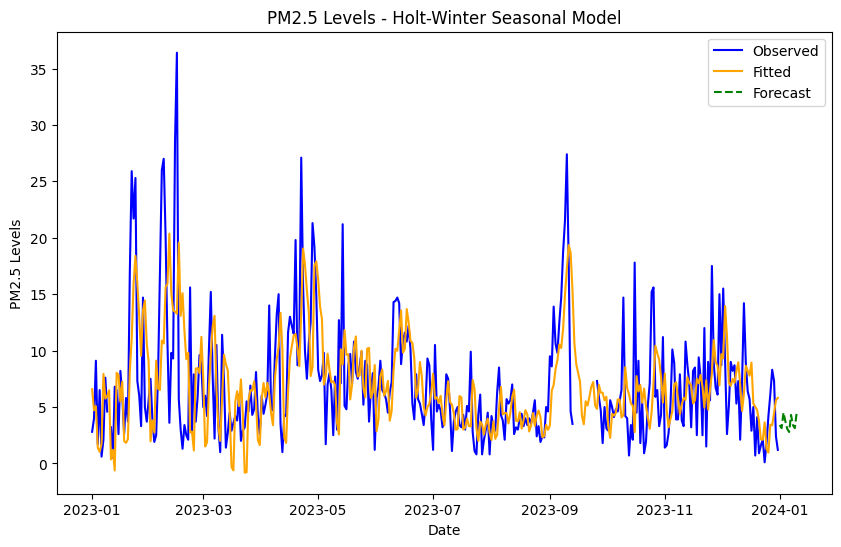

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(pm2, label="Observed", color="blue")
plt.plot(hw_model.fittedvalues, label="Fitted", color="orange")
plt.plot(forecast, label="Forecast", color="green", linestyle="--")
plt.title("PM2.5 Levels - Holt-Winter Seasonal Model")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.show()

In [3]:
datas = pd.read_csv('index_of_economic_freedom_2024.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 3717: invalid continuation byte